In [24]:
#dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from scipy.stats import sem

In [25]:
#load files into variables
drugData = "mouse_drug_data.csv"
trialData = "clinicaltrial_data.csv"

In [26]:
#read the files as data frames
drugDataDf = pd.read_csv(drugData)
trialDataDf = pd.read_csv(trialData)

In [27]:
#merge the two data frames into one
mouseDataDf = pd.merge(drugDataDf, trialDataDf, on=("Mouse ID"))

In [28]:
#group data by "Drug" and "Timepoint" columns, 
#and calculate the mean and the standard error of the mean for the "Tumor Volume (mm3)" column
volDataDf = mouseDataDf.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" :["mean", "sem"]})

In [29]:
#create a list of the tumor volume mean for each of the four drugs being compared
capVolMeanList = volDataDf.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"mean"].tolist()
infVolMeanList = volDataDf.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
ketVolMeanList = volDataDf.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()
plaVolMeanList = volDataDf.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"mean"].tolist()

In [30]:
#create a list of the volume standard error for each of the four drugs being compared
capVolSEMList = volDataDf.loc["Capomulin"].loc[:,"Tumor Volume (mm3)"].loc[:,"sem"].tolist()
infVolSEMList = volDataDf.loc["Infubinol"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
ketVolSEMList = volDataDf.loc["Ketapril"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()
plaVolSEMList = volDataDf.loc["Placebo"].loc[:, "Tumor Volume (mm3)"].loc[:,"sem"].tolist()

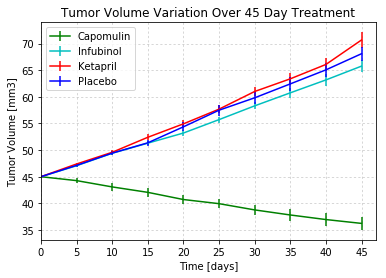

In [31]:
#create a plot for the volume data:
ax = plt.subplot(111)

#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)

#set the plot title, and axis titles
plt.title("Tumor Volume Variation Over 45 Day Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Tumor Volume [mm3]")

#plot the "mean" list vs. the established x axis with error 
#for each of the four drugs on the same coordinate axis
#and color and label each drug differently
capLineV = ax.errorbar(xAxis, capVolMeanList, yerr=capVolSEMList, fmt="g",
                   label="Capomulin")
infLineV = ax.errorbar(xAxis, infVolMeanList, yerr=infVolSEMList, fmt="c",
                   label="Infubinol")
ketLineV = ax.errorbar(xAxis, ketVolMeanList, yerr=ketVolSEMList, fmt="r",
                   label="Ketapril")
plaLineV = ax.errorbar(xAxis, plaVolMeanList, yerr=plaVolSEMList, fmt="b",
                   label="Placebo")

#set ticks along x axis to correspond to plotted x values
ax.set_xticks([value for value in xAxis], minor=False)

#add grid lines to graph 
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

#set x axis limit to end 2 units past final plotted x value
plt.xlim(0, max(xAxis)+2)

#add legend
ax.legend(loc=2)

#save and show the resulting figure
# plt.savefig("TumorVolumeScatter.png")
plt.show()

In [32]:
#group data by "Drug" and "Timepoint" columns, 
#and calculate the mean and the standard error of the mean for the "Metastatic Sites" column
metaDataDf = mouseDataDf.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites" :["mean", "sem"]})

In [33]:
#create a list of the metastatic sites mean for each of the four drugs being compared
capMetaMeanList = metaDataDf.loc["Capomulin"].loc[:,"Metastatic Sites"].loc[:,"mean"].tolist()
infMetaMeanList = metaDataDf.loc["Infubinol"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()
ketMetaMeanList = metaDataDf.loc["Ketapril"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()
plaMetaMeanList = metaDataDf.loc["Placebo"].loc[:, "Metastatic Sites"].loc[:,"mean"].tolist()

In [34]:
#create a list of the metastatic sites standard error for each of the four drugs being compared
capMetaSEMList = metaDataDf.loc["Capomulin"].loc[:,"Metastatic Sites"].loc[:,"sem"].tolist()
infMetaSEMList = metaDataDf.loc["Infubinol"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()
ketMetaSEMList = metaDataDf.loc["Ketapril"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()
plaMetaSEMList = metaDataDf.loc["Placebo"].loc[:, "Metastatic Sites"].loc[:,"sem"].tolist()

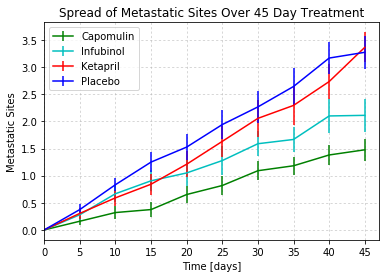

In [35]:
#create a plot for the metastatic sites data:
ax = plt.subplot(111)

#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)

#set the plot title, and axis titles
plt.title("Spread of Metastatic Sites Over 45 Day Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Metastatic Sites")

#plot the "mean" list vs. the established x axis with error 
#for each of the four drugs on the same coordinate axis
#and color and label each drug differently
capLineM = ax.errorbar(xAxis, capMetaMeanList, yerr=capMetaSEMList, fmt="g",
                   label="Capomulin")
infLineM = ax.errorbar(xAxis, infMetaMeanList, yerr=infMetaSEMList, fmt="c",
                   label="Infubinol")
ketLineM = ax.errorbar(xAxis, ketMetaMeanList, yerr=ketMetaSEMList, fmt="r",
                   label="Ketapril")
plaLineM = ax.errorbar(xAxis, plaMetaMeanList, yerr=plaMetaSEMList, fmt="b",
                   label="Placebo")

#set ticks along x axis to correspond to plotted x values
ax.set_xticks([value for value in xAxis], minor=False)

#add grid lines to graph 
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

#set x axis limit to end 2 units past final plotted x value
plt.xlim(0, max(xAxis)+2)

#add legend
ax.legend(loc=2)

#save and show the resulting figure
plt.savefig("MetastaticSiteSpread.png")
plt.show()

In [36]:
#group data by "Drug" and "Timepoint" columns, 
#and sum the values of each timepoint (i.e. count number of mice treated at each timepoint)
survivalData = mouseDataDf.groupby(["Drug", "Timepoint"])["Timepoint"].count()

In [37]:
#create a list of the timepoint value counts for each of the four drugs being compared
capLiveMice = survivalData.loc["Capomulin"].tolist()
infLiveMice = survivalData.loc["Infubinol"].tolist()
ketLiveMice = survivalData.loc["Ketapril"].tolist()
plaLiveMice = survivalData.loc["Placebo"].tolist()

In [38]:
#divide each item in timepoint counts list by the first item in said list 
#and mult. by 100 to get percent left of each item
capSurvivalRate = np.divide(capLiveMice, capLiveMice[0])*100
infSurvivalRate = np.divide(infLiveMice, infLiveMice[0])*100
ketSurvivalRate = np.divide(ketLiveMice, ketLiveMice[0])*100
plaSurvivalRate = np.divide(plaLiveMice, plaLiveMice[0])*100

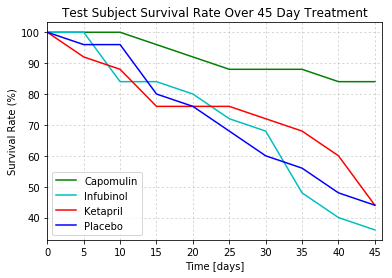

In [39]:
#create a plot for the survival data:
ax = plt.subplot(111)

#set the x axis from 0 to 50 in increments of 5
xAxis = np.arange(0, 50, 5)

#set the plot title, and axis titles
plt.title("Test Subject Survival Rate Over 45 Day Treatment")
plt.xlabel("Time [days]")
plt.ylabel("Survival Rate (%)")

#plot the survival rate list vs. the established x axis 
#for each of the four drugs on the same coordinate axis
#and color and label each drug differently
capLineS = ax.errorbar(xAxis, capSurvivalRate, fmt="g", label="Capomulin")
infLineS = ax.errorbar(xAxis, infSurvivalRate, fmt="c", label="Infubinol")
ketLineS = ax.errorbar(xAxis, ketSurvivalRate, fmt="r", label="Ketapril")
plaLineS = ax.errorbar(xAxis, plaSurvivalRate, fmt="b", label="Placebo")

#set ticks along x axis to correspond to plotted x values
ax.set_xticks([value for value in xAxis], minor=False)

#add grid lines to graph 
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)

#set x axis limit to end 1 unit past final plotted x value
plt.xlim(0, max(xAxis) + 1)

#add legend
ax.legend(loc=3)

#save and show the resulting figure
plt.savefig("MiceSurvivalRate.png")
plt.show()

In [40]:
#create variables for calculation of percent change in tumor volume over treatment course
capBarVal = int(np.divide((capVolMeanList[-1] - capVolMeanList[0]), capVolMeanList[0])*100)
infBarVal = int(np.divide((infVolMeanList[-1] - infVolMeanList[0]), infVolMeanList[0])*100)
ketBarVal = int(np.divide((ketVolMeanList[-1] - ketVolMeanList[0]), ketVolMeanList[0])*100)
plaBarVal = int(np.divide((plaVolMeanList[-1] - plaVolMeanList[0]), plaVolMeanList[0])*100)

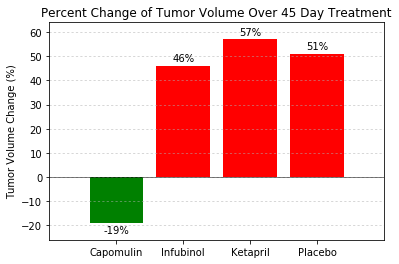

In [53]:
#create a bar graph for the tumor volume percent change data:

#set x and y axis 
yAxis = [capBarVal, infBarVal, ketBarVal, plaBarVal]
xAxis = np.arange(len(yAxis))

#set the plot title, and y axis title
plt.title("Percent Change of Tumor Volume Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")

#create a loop to color bars according to +/- percent change
colors = []
for item in yAxis:
    if item < 0:
        colors.append('green')
    else:
        colors.append('red')

#plot the x and y axis data into a bar graph        
tumVolGraph = plt.bar(xAxis, yAxis, color=colors, alpha=1.0)

#set ticks along x axis to correspond to plotted x values, and label ticks accordingly
tickLoc = [value for value in xAxis]
plt.xticks(tickLoc, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

#add grid lines and a horizontal line to the graph
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)
plt.hlines(0, -1, len(xAxis), alpha = 1.0, linewidth=0.5)

#set x axis and y axis limits
plt.xlim(-1, len(xAxis))
plt.ylim(min(yAxis) - 7, max(yAxis) + 7)

#add value of each bar to the graph
def barLabel(rects):
    for i,rect in enumerate(rects):
        height = int(yAxis[i])
        if height > 0:
            plt.text(rect.get_x() + rect.get_width()/2., yAxis[i] + 1, "%s%%"% (yAxis[i]),
                ha="center", va="bottom", color="black")
        else:
            plt.text(rect.get_x() + rect.get_width()/2., yAxis[i] - 1, "%s%%"% (yAxis[i]),
                ha="center", va="top", color="black")          

barLabel(tumVolGraph)

#save and show the resulting figure
plt.savefig("TumorVolumeBar.png")
plt.show()

In [ ]:
From comparing the results gathered for three drug treatments, Capomulin, Infubinol, Ketapril, and a placebo,
the three main observations that can be made are:

1. When comparing all 4 treatments, the mice given Capomulin outperformed 
the other 3 treatments in every physiological response tested.  

2. Capomulin was the only treatment out of the four to show success in decreasing tumor volume. 
The mice given this drug showed a steady decline in tumor volume, with a total decrease by an 
average of 19% over the course of the 45 day treatment.

3. When comparing with the placebo, the drugs Infubinol and Ketapril actually had a negative effect 
on all physiological responses tested. The mice given the placebo had a higher survival rate than 
those given Infubinol, and showed similar/slightly better results than Ketapril with respect to tumor 
volume and spread of metastatic sites.

In conclusion, the mice given Capomulin showed improvement in symptoms, while the mice given
Infubinol and Ketapril appear be worse off than those treated with a placebo.
